# Assignment 17 - Support Vector Machines ( Salary Data)

## Problem Statement:
To Prepare a classification model using SVM for salary data:

### Importing required libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing

### Importing Dataset:

In [2]:
df_train = pd.read_csv("C:/Users/DELL/Desktop/ExcelR DS Assignments/Assignment 17 - Support Vector Machines/SalaryData_Train(1).csv")

In [3]:
df_test = pd.read_csv("C:/Users/DELL/Desktop/ExcelR DS Assignments/Assignment 17 - Support Vector Machines/SalaryData_Test(1).csv")

In [4]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


### Performing EDA:

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [8]:
df_train.shape

(30161, 14)

In [9]:
df_test.shape

(15060, 14)

In [10]:
train_data = df_train.copy()

In [11]:
test_data = df_test.copy()

In [12]:
train_data.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [13]:
le = preprocessing.LabelEncoder()
train_data['workclass']= le.fit_transform(train_data['workclass'])
train_data['maritalstatus']= le.fit_transform(train_data['maritalstatus'])
train_data['occupation']= le.fit_transform(train_data['occupation'])
train_data['relationship']= le.fit_transform(train_data['relationship'])
train_data['race']= le.fit_transform(train_data['race'])
train_data['sex']= le.fit_transform(train_data['sex'])
train_data['native']= le.fit_transform(train_data['native'])
train_data['Salary']= le.fit_transform(train_data['Salary'])

In [14]:
le = preprocessing.LabelEncoder()
test_data['workclass']= le.fit_transform(test_data['workclass'])
test_data['maritalstatus']= le.fit_transform(test_data['maritalstatus'])
test_data['occupation']= le.fit_transform(test_data['occupation'])
test_data['relationship']= le.fit_transform(test_data['relationship'])
test_data['race']= le.fit_transform(test_data['race'])
test_data['sex']= le.fit_transform(test_data['sex'])
test_data['native']= le.fit_transform(test_data['native'])
test_data['Salary']= le.fit_transform(test_data['Salary'])

In [15]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,Bachelors,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,Bachelors,13,2,3,0,4,1,0,0,13,37,0
2,38,2,HS-grad,9,0,5,1,4,1,0,0,40,37,0
3,53,2,11th,7,2,5,0,2,1,0,0,40,37,0
4,28,2,Bachelors,13,2,9,5,2,0,0,0,40,4,0


In [16]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,11th,7,4,6,3,2,1,0,0,40,37,0
1,38,2,HS-grad,9,2,4,0,4,1,0,0,50,37,0
2,28,1,Assoc-acdm,12,2,10,0,4,1,0,0,40,37,1
3,44,2,Some-college,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,10th,6,4,7,1,4,1,0,0,30,37,0


In [17]:
train_data.drop(['education'],axis=1,inplace=True)

In [18]:
test_data.drop(['education'],axis=1,inplace=True)

In [19]:
train_data.Salary.value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

In [20]:
test_data.Salary.value_counts()

0    11360
1     3700
Name: Salary, dtype: int64

### Data Visualisation:

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'workclass'}>,
        <AxesSubplot:title={'center':'educationno'}>,
        <AxesSubplot:title={'center':'maritalstatus'}>],
       [<AxesSubplot:title={'center':'occupation'}>,
        <AxesSubplot:title={'center':'relationship'}>,
        <AxesSubplot:title={'center':'race'}>,
        <AxesSubplot:title={'center':'sex'}>],
       [<AxesSubplot:title={'center':'capitalgain'}>,
        <AxesSubplot:title={'center':'capitalloss'}>,
        <AxesSubplot:title={'center':'hoursperweek'}>,
        <AxesSubplot:title={'center':'native'}>],
       [<AxesSubplot:title={'center':'Salary'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

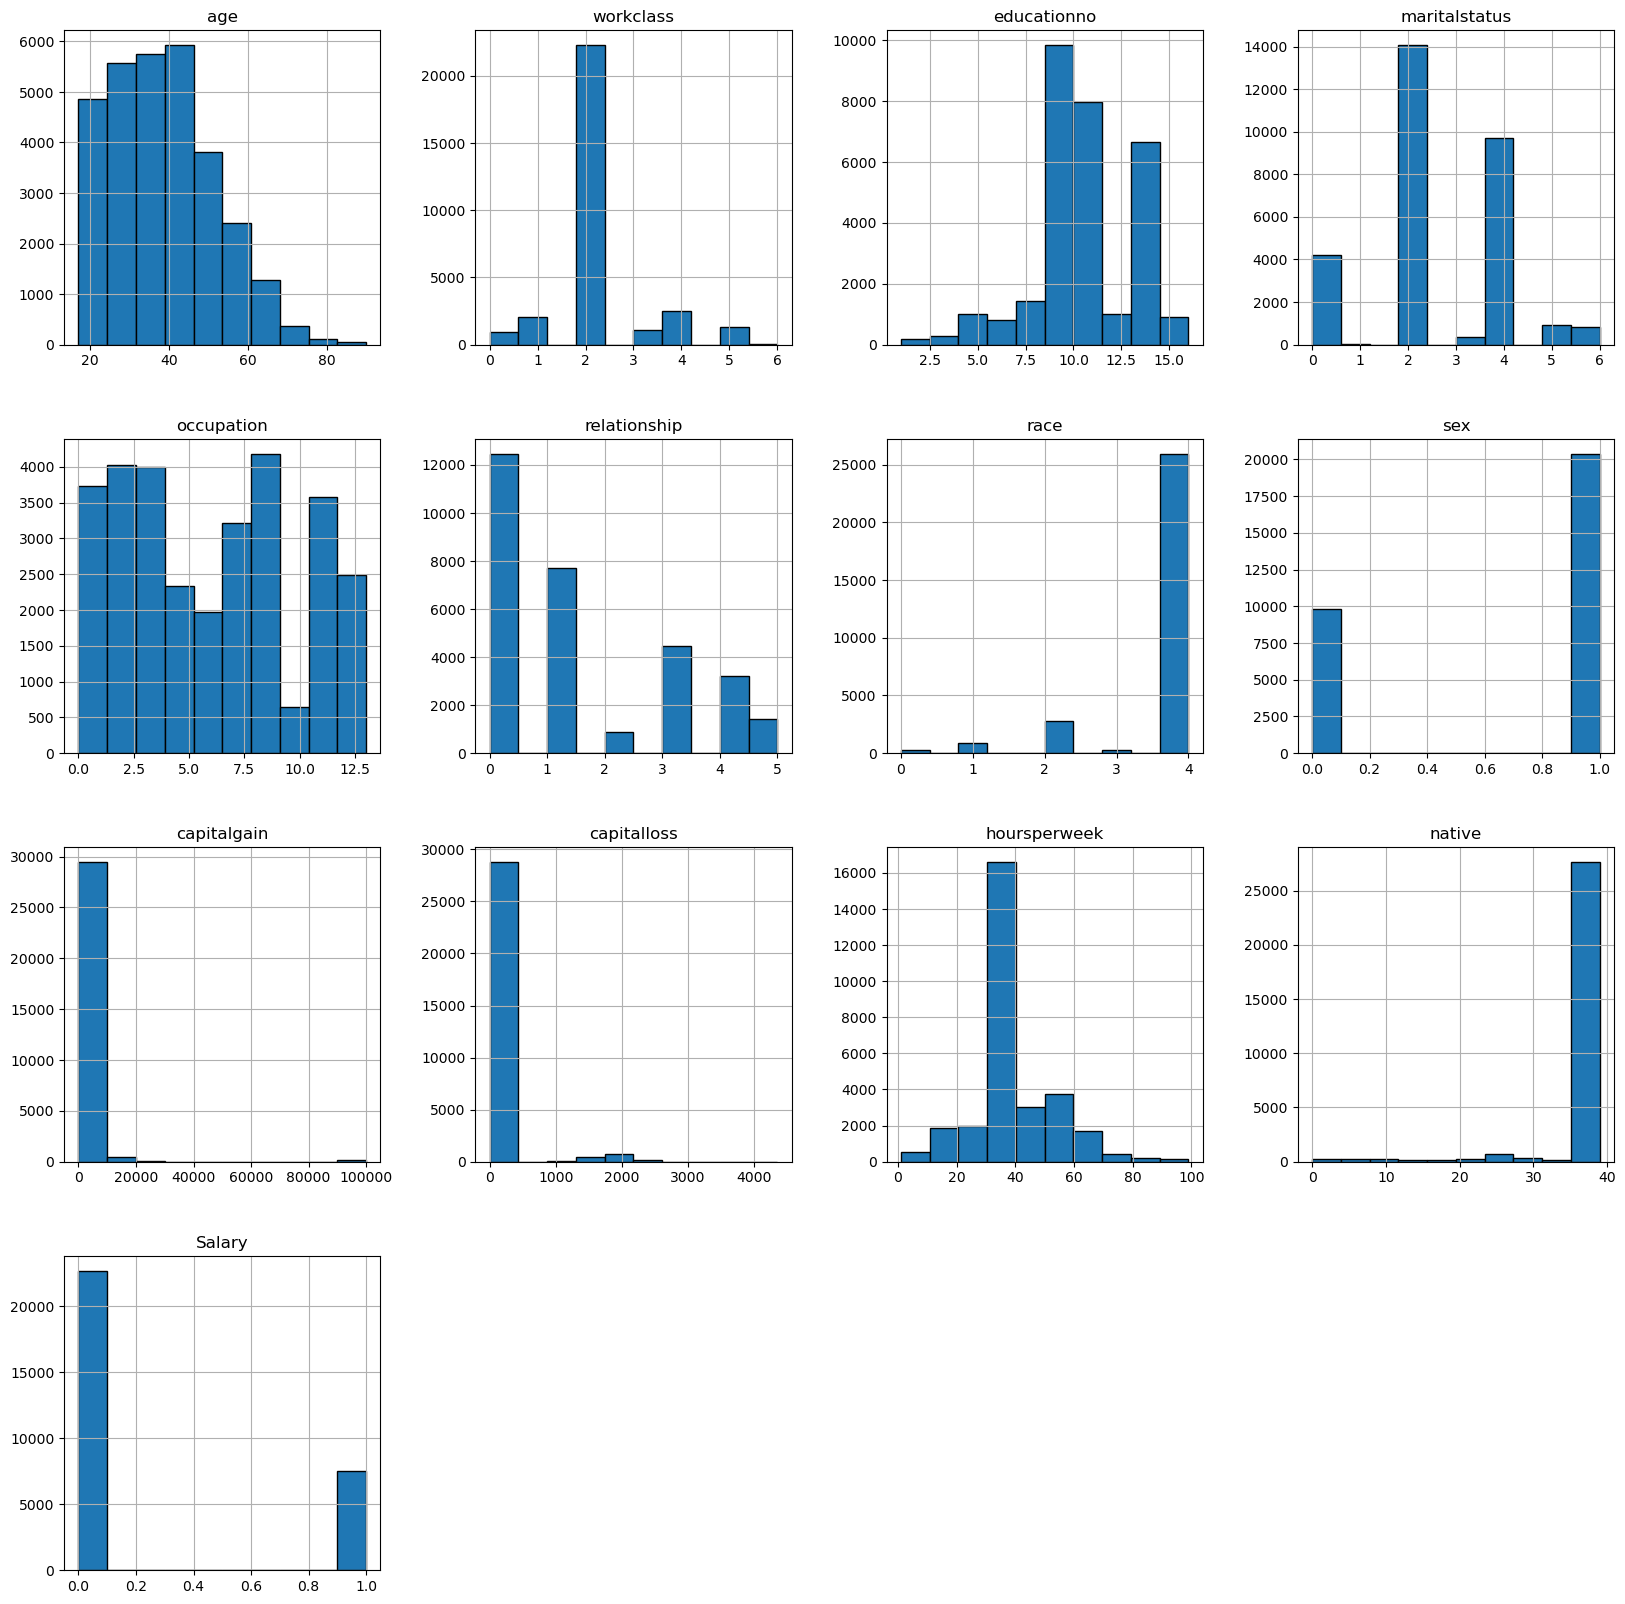

In [21]:
import seaborn as sns
train_data.hist(edgecolor='black',figsize=(20,20),linewidth=1)

### Splitting the data into Target and Features:

In [22]:
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [23]:
#Normalization:

def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [24]:
X_train = norm_func(X_train)
X_test =  norm_func(X_test)

### SVM Model:

In [25]:
model_linear = SVC(kernel = "linear",random_state=40,gamma=0.1,C=1.0)
model_linear.fit(X_train,y_train)

SVC(gamma=0.1, kernel='linear', random_state=40)

In [26]:
pred_test_linear = model_linear.predict(X_test)

In [27]:
np.mean(pred_test_linear==y_test)

0.8098273572377158

In [28]:
# Kernel = poly:

model_poly = SVC(kernel = "poly",random_state=40,gamma=0.1,C=1.0)
model_poly.fit(X_train,y_train)
pred_test_poly = model_poly.predict(X_test)

In [29]:
np.mean(pred_test_poly==y_test)

0.8193227091633466

In [30]:
# kernel = rbf:

model_rbf = SVC(kernel = "rbf",random_state=40,gamma=0.1,C=1.0)
model_rbf.fit(X_train,y_train)
pred_test_rbf = model_rbf.predict(X_test)

In [31]:
np.mean(pred_test_rbf==y_test)

0.8287516600265604

In [32]:
#kernel ='sigmoid':

model_sig = SVC(kernel = "sigmoid",random_state=40,gamma=0.1,C=1.0)
model_sig.fit(X_train,y_train)
pred_test_sig = model_rbf.predict(X_test)

In [33]:
np.mean(pred_test_sig==y_test)

0.8287516600265604

### SVM  With GridSearch:

* **Kernel = rbf.**

In [34]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range:

param_grid = {'C': [ 1.0],  
              'gamma': [0.1], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search:

grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ......C=1.0, gamma=0.1, kernel=rbf;, score=0.820 total time=  31.3s
[CV 2/5] END ......C=1.0, gamma=0.1, kernel=rbf;, score=0.830 total time=  31.4s
[CV 3/5] END ......C=1.0, gamma=0.1, kernel=rbf;, score=0.835 total time=  32.8s
[CV 4/5] END ......C=1.0, gamma=0.1, kernel=rbf;, score=0.831 total time=  43.1s
[CV 5/5] END ......C=1.0, gamma=0.1, kernel=rbf;, score=0.832 total time=  42.4s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1.0], 'gamma': [0.1], 'kernel': ['rbf']},
             verbose=3)

In [35]:
# print best parameter after tuning 
print(grid.best_params_) 

{'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}


In [36]:
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

SVC(gamma=0.1)


In [37]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89     11360
           1       0.74      0.47      0.57      3700

    accuracy                           0.83     15060
   macro avg       0.79      0.71      0.73     15060
weighted avg       0.82      0.83      0.81     15060



In [38]:
acc = accuracy_score(y_test,  grid_predictions) * 100
print("Accuracy =", acc)

Accuracy = 82.87516600265604


In [39]:
confusion_matrix(y_test,grid_predictions)

array([[10742,   618],
       [ 1961,  1739]], dtype=int64)

* **Kernel = Linear.**

In [40]:
# defining parameter range:

param_grid = {'C': [ 1.0],  
              'gamma': [0.1], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search:

grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ...C=1.0, gamma=0.1, kernel=linear;, score=0.813 total time=  22.5s
[CV 2/5] END ...C=1.0, gamma=0.1, kernel=linear;, score=0.808 total time=  21.7s
[CV 3/5] END ...C=1.0, gamma=0.1, kernel=linear;, score=0.815 total time=  20.1s
[CV 4/5] END ...C=1.0, gamma=0.1, kernel=linear;, score=0.806 total time=  25.6s
[CV 5/5] END ...C=1.0, gamma=0.1, kernel=linear;, score=0.818 total time=  19.6s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1.0], 'gamma': [0.1], 'kernel': ['linear']},
             verbose=3)

In [41]:
# print best parameter after tuning 
print(grid.best_params_) 

{'C': 1.0, 'gamma': 0.1, 'kernel': 'linear'}


In [42]:
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

SVC(gamma=0.1, kernel='linear')


In [43]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     11360
           1       0.77      0.32      0.45      3700

    accuracy                           0.81     15060
   macro avg       0.79      0.65      0.67     15060
weighted avg       0.80      0.81      0.78     15060



In [44]:
acc = accuracy_score(y_test,  grid_predictions) * 100
print("Accuracy =", acc)

Accuracy = 80.98273572377158


In [45]:
confusion_matrix(y_test,grid_predictions)

array([[11003,   357],
       [ 2507,  1193]], dtype=int64)

* **Kernel - Poly.**

In [46]:
# defining parameter range:

param_grid = {'C': [ 1.0],  
              'gamma': [0.1], 
              'kernel': ['poly']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search:

grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .....C=1.0, gamma=0.1, kernel=poly;, score=0.812 total time=  24.1s
[CV 2/5] END .....C=1.0, gamma=0.1, kernel=poly;, score=0.819 total time=  22.7s
[CV 3/5] END .....C=1.0, gamma=0.1, kernel=poly;, score=0.820 total time=  21.5s
[CV 4/5] END .....C=1.0, gamma=0.1, kernel=poly;, score=0.821 total time=  22.1s
[CV 5/5] END .....C=1.0, gamma=0.1, kernel=poly;, score=0.816 total time=  22.3s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1.0], 'gamma': [0.1], 'kernel': ['poly']},
             verbose=3)

In [47]:
# print best parameter after tuning 
print(grid.best_params_) 

{'C': 1.0, 'gamma': 0.1, 'kernel': 'poly'}


In [48]:
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

SVC(gamma=0.1, kernel='poly')


In [49]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     11360
           1       0.74      0.41      0.53      3700

    accuracy                           0.82     15060
   macro avg       0.79      0.68      0.71     15060
weighted avg       0.81      0.82      0.80     15060



In [50]:
acc = accuracy_score(y_test,  grid_predictions) * 100
print("Accuracy =", acc)

Accuracy = 81.93227091633466


In [51]:
confusion_matrix(y_test,grid_predictions)

array([[10821,   539],
       [ 2182,  1518]], dtype=int64)

* **Kernel - Sigmoid.**

In [52]:
# defining parameter range:

param_grid = {'C': [ 1.0],  
              'gamma': [0.1], 
              'kernel': ['sigmoid']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search:

grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..C=1.0, gamma=0.1, kernel=sigmoid;, score=0.796 total time=  33.0s
[CV 2/5] END ..C=1.0, gamma=0.1, kernel=sigmoid;, score=0.797 total time=  36.5s
[CV 3/5] END ..C=1.0, gamma=0.1, kernel=sigmoid;, score=0.803 total time=  30.8s
[CV 4/5] END ..C=1.0, gamma=0.1, kernel=sigmoid;, score=0.799 total time=  37.6s
[CV 5/5] END ..C=1.0, gamma=0.1, kernel=sigmoid;, score=0.802 total time=  39.6s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1.0], 'gamma': [0.1], 'kernel': ['sigmoid']},
             verbose=3)

In [53]:
# print best parameter after tuning 
print(grid.best_params_) 

{'C': 1.0, 'gamma': 0.1, 'kernel': 'sigmoid'}


In [54]:
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

SVC(gamma=0.1, kernel='sigmoid')


In [55]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87     11360
           1       0.62      0.39      0.48      3700

    accuracy                           0.79     15060
   macro avg       0.72      0.66      0.68     15060
weighted avg       0.77      0.79      0.77     15060



In [56]:
acc = accuracy_score(y_test,  grid_predictions) * 100
print("Accuracy =", acc)

Accuracy = 79.22974767596281


In [57]:
confusion_matrix(y_test,grid_predictions)

array([[10473,   887],
       [ 2241,  1459]], dtype=int64)